# EDA of Hospitality Data

## Data Exploration

In [1]:
import pandas as pd

In [2]:
df_bookings = pd.read_csv('./datasets/fact_bookings.csv')
df_bookings.head(10)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-2022,01-05-2022,02-05-2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-2022,01-05-2022,04-05-2022,2.0,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,28-04-2022,01-05-2022,02-05-2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,01-05-2022,01-05-2022,03-05-2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-2022,01-05-2022,06-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-2022,01-05-2022,03-05-2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
8,May012216558RT19,16558,30-04-2022,01-05-2022,02-05-2022,2.0,RT1,tripster,NaN,Checked Out,9100,9100
9,May012216558RT110,16558,28-04-2022,01-05-2022,02-05-2022,1.0,RT1,others,4.0,Checked Out,9100,9100


In [3]:
df_bookings.shape

(134590, 12)

In [4]:
df_bookings['room_category'].unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [5]:
df_bookings['booking_platform'].unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [6]:
df_bookings['booking_platform'].value_counts().sort_values(ascending=False)

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: ylabel='booking_platform'>

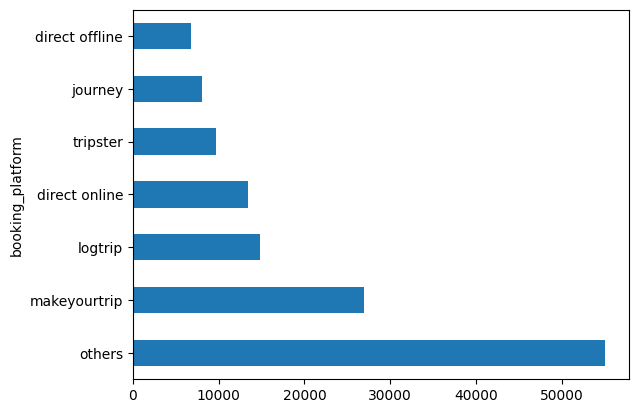

In [7]:
df_bookings.booking_platform.value_counts().plot(kind='barh')

In [8]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.531051e+04,12696.123256
std,1093.055847,1.034885,1.235009,8.967997e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [9]:
df_bookings['revenue_generated'].min(), df_bookings['revenue_generated'].max()

(np.int64(6500), np.int64(28560000))

In [10]:
df_date = pd.read_csv('./datasets/dim_date.csv')
df_hotels = pd.read_csv('./datasets/dim_hotels.csv')
df_rooms = pd.read_csv('./datasets/dim_rooms.csv')
df_agg_bookings = pd.read_csv('./datasets/fact_aggregated_bookings.csv')

In [11]:
df_hotels.shape

(25, 4)

In [12]:
df_hotels.head(10)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi
5,16563,Atliq Palace,Business,Delhi
6,17558,Atliq Grands,Luxury,Mumbai
7,17559,Atliq Exotica,Luxury,Mumbai
8,17560,Atliq City,Business,Mumbai
9,17561,Atliq Blu,Luxury,Mumbai


In [13]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

In [14]:
df_hotels.city.value_counts()

city
Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: count, dtype: int64

In [15]:
df_agg_bookings.head(10)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30.0
1,19562,01-May-22,RT1,28,30.0
2,19563,01-May-22,RT1,23,30.0
3,17558,01-May-22,RT1,30,19.0
4,16558,01-May-22,RT1,18,19.0
5,17560,01-May-22,RT1,28,40.0
6,19558,01-May-22,RT1,25,40.0
7,19560,01-May-22,RT1,23,26.0
8,17561,01-May-22,RT1,22,NaN
9,16560,01-May-22,RT1,24,34.0


In [16]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

In [17]:
df_agg_bookings.groupby("property_id")["successful_bookings"].sum().sort_values(ascending=False)

property_id
16559    7338
18562    7333
16563    7211
18560    6638
18561    6458
17563    6337
17559    6142
19560    6079
17560    6013
19562    5812
19561    5736
19563    5413
18559    5256
17561    5183
17558    5053
16562    4820
18563    4737
19559    4729
16560    4693
18558    4475
16561    4418
19558    4400
17564    3982
17562    3424
16558    3153
Name: successful_bookings, dtype: int64

In [18]:
df_agg_bookings[df_agg_bookings['successful_bookings'] > df_agg_bookings['capacity']]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,01-May-22,RT1,30,19.0
12,16563,01-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,02-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [19]:
df_agg_bookings.groupby('property_id', as_index=False)['capacity'].max().sort_values(by='capacity', ascending=False).head(10)


,property_id,capacity
6,17558,50.0
8,17560,45.0
22,19561,45.0
24,19563,45.0
11,17563,44.0
14,18559,44.0
4,16562,43.0
5,16563,41.0
1,16559,41.0
20,19559,41.0


***
**Data Cleaning**
***

In [20]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.531051e+04,12696.123256
std,1093.055847,1.034885,1.235009,8.967997e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [21]:
df_bookings[df_bookings['no_guests'] <= 0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-2022,01-05-2022,02-05-2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-2022,01-05-2022,02-05-2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12-05-2022,12-05-2022,14-05-2022,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,08-05-2022,12-05-2022,14-05-2022,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,05-05-2022,12-05-2022,17-05-2022,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10-05-2022,12-05-2022,17-05-2022,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,05-06-2022,08-06-2022,13-06-2022,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-2022,20-07-2022,22-07-2022,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-2022,31-07-2022,01-08-2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [22]:
df_bookings = df_bookings[df_bookings['no_guests'] > 0]
df_bookings.shape

(134578, 12)

In [23]:
mean_revenue_generated = df_bookings.revenue_generated.mean().round(2)
mean_revenue_generated

np.float64(15310.49)

In [24]:
std_revenue_generated = df_bookings.revenue_generated.std().round(2)
std_revenue_generated

np.float64(89683.94)

In [25]:
upper_limit, lower_limit = (
    mean_revenue_generated + 3 * std_revenue_generated,
    mean_revenue_generated - 3 * std_revenue_generated,
)
upper_limit, lower_limit

(np.float64(284362.31), np.float64(-253741.33000000002))

In [26]:
df_bookings[df_bookings['revenue_generated'] > upper_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
111,May012216559RT32,16559,29-04-2022,01-05-2022,02-05-2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-2022,01-05-2022,04-05-2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-2022,28-07-2022,29-07-2022,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [27]:
df_bookings["revenue_generated"] = df_bookings["revenue_realized"].where(
    (df_bookings["revenue_generated"] > upper_limit) & (df_bookings["booking_status"] == "Checked Out"),
    df_bookings["revenue_generated"]
)
df_bookings = df_bookings[df_bookings['revenue_generated'] < upper_limit]

In [28]:
df_bookings.revenue_realized.describe()

count    134577.000000
mean      12696.073319
std        6927.830648
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [29]:
mean_revenue_realized, std_revenue_realized = df_bookings.revenue_realized.mean().round(
    2
), df_bookings.revenue_realized.std().round(2)
mean_revenue_realized, std_revenue_realized

(np.float64(12696.07), np.float64(6927.83))

In [30]:
upper_limit_revenue_realized, lower_limit_revenue_realized = (
    mean_revenue_realized + 3 * std_revenue_realized,
    mean_revenue_realized - 3 * std_revenue_realized,
)
upper_limit_revenue_realized, lower_limit_revenue_realized

(np.float64(33479.56), np.float64(-8087.419999999998))

In [31]:
df_bookings[df_bookings['revenue_realized'] > upper_limit_revenue_realized]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-2022,01-05-2022,07-05-2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,01-05-2022,01-05-2022,02-05-2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-2022,01-05-2022,03-05-2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-2022,01-05-2022,07-05-2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-2022,01-05-2022,03-05-2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-2022,31-07-2022,02-08-2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-2022,31-07-2022,01-08-2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-2022,31-07-2022,01-08-2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-2022,31-07-2022,06-08-2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [32]:
df_agg_bookings[df_agg_bookings.isna().any(axis=1)]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,01-May-22,RT1,22,NaN
14,17562,01-May-22,RT1,12,NaN


In [33]:
df_agg_bookings[df_agg_bookings['room_category'] == 'RT1'].head(10)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30.0
1,19562,01-May-22,RT1,28,30.0
2,19563,01-May-22,RT1,23,30.0
3,17558,01-May-22,RT1,30,19.0
4,16558,01-May-22,RT1,18,19.0
5,17560,01-May-22,RT1,28,40.0
6,19558,01-May-22,RT1,25,40.0
7,19560,01-May-22,RT1,23,26.0
8,17561,01-May-22,RT1,22,NaN
9,16560,01-May-22,RT1,24,34.0


In [34]:
mean_rt1_capacity = df_agg_bookings[df_agg_bookings['room_category'] == 'RT1']['capacity'].mean().round(2)
median_rt1_capacity = df_agg_bookings[df_agg_bookings['room_category'] == 'RT1']['capacity'].median().round(2)
mean_rt1_capacity, median_rt1_capacity

(np.float64(28.89), np.float64(30.0))

In [35]:
df_agg_bookings.loc[
    (df_agg_bookings['room_category'] == 'RT1') & (df_agg_bookings['capacity'].isna()), 
    'capacity'
] = median_rt1_capacity
df_agg_bookings[df_agg_bookings.isna().any(axis=1)]

,property_id,check_in_date,room_category,successful_bookings,capacity


***
**Data Transformation**
***

In [36]:
df_agg_bookings.head(10)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30.0
1,19562,01-May-22,RT1,28,30.0
2,19563,01-May-22,RT1,23,30.0
3,17558,01-May-22,RT1,30,19.0
4,16558,01-May-22,RT1,18,19.0
5,17560,01-May-22,RT1,28,40.0
6,19558,01-May-22,RT1,25,40.0
7,19560,01-May-22,RT1,23,26.0
8,17561,01-May-22,RT1,22,30.0
9,16560,01-May-22,RT1,24,34.0


In [37]:
df_agg_bookings["occupancy_rate"] = (
    df_agg_bookings["successful_bookings"] / df_agg_bookings["capacity"]
).round(2)

df_agg_bookings.head(10)

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rate
0,16559,01-May-22,RT1,25,30.0,0.83
1,19562,01-May-22,RT1,28,30.0,0.93
2,19563,01-May-22,RT1,23,30.0,0.77
3,17558,01-May-22,RT1,30,19.0,1.58
4,16558,01-May-22,RT1,18,19.0,0.95
5,17560,01-May-22,RT1,28,40.0,0.70
6,19558,01-May-22,RT1,25,40.0,0.62
7,19560,01-May-22,RT1,23,26.0,0.88
8,17561,01-May-22,RT1,22,30.0,0.73
9,16560,01-May-22,RT1,24,34.0,0.71


In [38]:
df_agg_bookings["occupancy_rate"] = (df_agg_bookings["occupancy_rate"] * 100).round(2)
df_agg_bookings.head(10)

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rate
0,16559,01-May-22,RT1,25,30.0,83.0
1,19562,01-May-22,RT1,28,30.0,93.0
2,19563,01-May-22,RT1,23,30.0,77.0
3,17558,01-May-22,RT1,30,19.0,158.0
4,16558,01-May-22,RT1,18,19.0,95.0
5,17560,01-May-22,RT1,28,40.0,70.0
6,19558,01-May-22,RT1,25,40.0,62.0
7,19560,01-May-22,RT1,23,26.0,88.0
8,17561,01-May-22,RT1,22,30.0,73.0
9,16560,01-May-22,RT1,24,34.0,71.0


In [39]:
df_agg_bookings['occupancy_rate'].describe()

count    9200.000000
mean       58.398478
std        16.078103
min        21.000000
25%        47.000000
50%        56.000000
75%        67.000000
max       473.000000
Name: occupancy_rate, dtype: float64

In [40]:
df_agg_bookings[df_agg_bookings['occupancy_rate'] > 100]

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rate
3,17558,01-May-22,RT1,30,19.0,158.0
12,16563,01-May-22,RT1,100,41.0,244.0
4136,19558,11-Jun-22,RT2,50,39.0,128.0
6209,19560,02-Jul-22,RT1,123,26.0,473.0
8522,19559,25-Jul-22,RT1,35,24.0,146.0
9194,18563,31-Jul-22,RT4,20,18.0,111.0


***
**Insights Generation**
***

**1. What is an average occupancy rate in each of the room categories?**

In [41]:
df_agg_bookings.groupby('room_category')['occupancy_rate'].mean().round(2)

room_category
RT1    58.24
RT2    58.04
RT3    58.01
RT4    59.30
Name: occupancy_rate, dtype: float64

In [42]:
df_rooms.rename(columns={"room_id": "room_category"}, inplace=True)
df_rooms.head()

,room_category,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [43]:
df = pd.merge(df_agg_bookings, df_rooms, on='room_category', how='left')
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rate,room_class
0,16559,01-May-22,RT1,25,30.0,83.0,Standard
1,19562,01-May-22,RT1,28,30.0,93.0,Standard
2,19563,01-May-22,RT1,23,30.0,77.0,Standard
3,17558,01-May-22,RT1,30,19.0,158.0,Standard
4,16558,01-May-22,RT1,18,19.0,95.0,Standard


In [44]:
df.groupby('room_class')['occupancy_rate'].mean().round(2)

room_class
Elite           58.04
Premium         58.01
Presidential    59.30
Standard        58.24
Name: occupancy_rate, dtype: float64

**2. Print average occupancy rate per city**

In [45]:
df = pd.merge(df, df_hotels, on='property_id', how='left')
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rate,room_class,property_name,category,city
0,16559,01-May-22,RT1,25,30.0,83.0,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,01-May-22,RT1,28,30.0,93.0,Standard,Atliq Bay,Luxury,Bangalore
2,19563,01-May-22,RT1,23,30.0,77.0,Standard,Atliq Palace,Business,Bangalore
3,17558,01-May-22,RT1,30,19.0,158.0,Standard,Atliq Grands,Luxury,Mumbai
4,16558,01-May-22,RT1,18,19.0,95.0,Standard,Atliq Grands,Luxury,Delhi


In [46]:
df.groupby('city')['occupancy_rate'].mean().round(2)

city
Bangalore    56.59
Delhi        61.62
Hyderabad    58.15
Mumbai       57.92
Name: occupancy_rate, dtype: float64

**3. When was the occupancy better? Weekday or Weekend?**

In [47]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May-22,W 19,weekend
1,02-May-22,May-22,W 19,weekeday
2,03-May-22,May-22,W 19,weekeday
3,04-May-22,May-22,W 19,weekeday
4,05-May-22,May-22,W 19,weekeday


In [48]:
df = pd.merge(df, df_date, left_on='check_in_date', right_on='date')
df.head(10)

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rate,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,01-May-22,RT1,25,30.0,83.0,Standard,Atliq Exotica,Luxury,Mumbai,01-May-22,May-22,W 19,weekend
1,19562,01-May-22,RT1,28,30.0,93.0,Standard,Atliq Bay,Luxury,Bangalore,01-May-22,May-22,W 19,weekend
2,19563,01-May-22,RT1,23,30.0,77.0,Standard,Atliq Palace,Business,Bangalore,01-May-22,May-22,W 19,weekend
3,17558,01-May-22,RT1,30,19.0,158.0,Standard,Atliq Grands,Luxury,Mumbai,01-May-22,May-22,W 19,weekend
4,16558,01-May-22,RT1,18,19.0,95.0,Standard,Atliq Grands,Luxury,Delhi,01-May-22,May-22,W 19,weekend
5,17560,01-May-22,RT1,28,40.0,70.0,Standard,Atliq City,Business,Mumbai,01-May-22,May-22,W 19,weekend
6,19558,01-May-22,RT1,25,40.0,62.0,Standard,Atliq Grands,Luxury,Bangalore,01-May-22,May-22,W 19,weekend
7,19560,01-May-22,RT1,23,26.0,88.0,Standard,Atliq City,Business,Bangalore,01-May-22,May-22,W 19,weekend
8,17561,01-May-22,RT1,22,30.0,73.0,Standard,Atliq Blu,Luxury,Mumbai,01-May-22,May-22,W 19,weekend
9,16560,01-May-22,RT1,24,34.0,71.0,Standard,Atliq City,Business,Delhi,01-May-22,May-22,W 19,weekend


In [49]:
df.groupby('day_type')['occupancy_rate'].mean().round(2)

day_type
weekeday    51.82
weekend     74.23
Name: occupancy_rate, dtype: float64

**4: In the month of June, what is the occupancy for different cities**

In [50]:
df_june_22 = df[df['mmm yy'] == 'Jun-22']
df_june_22.groupby('city')['occupancy_rate'].mean().round(2)

city
Bangalore    55.95
Delhi        61.47
Hyderabad    57.70
Mumbai       57.79
Name: occupancy_rate, dtype: float64

<Axes: ylabel='city'>

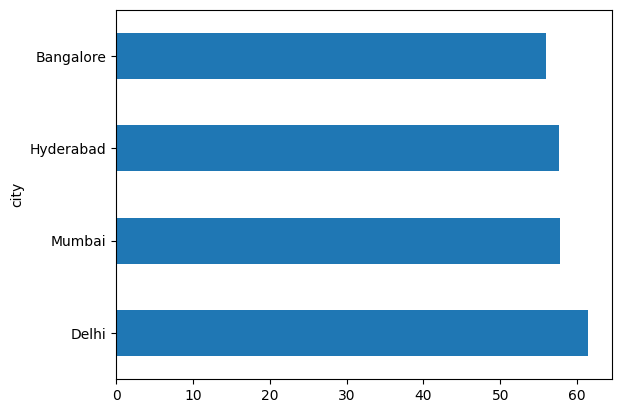

In [51]:
df_june_22.groupby('city')['occupancy_rate'].mean().round(2).sort_values(ascending=False).plot(kind="barh")

In [52]:
df_august = pd.read_csv('./datasets/new_data_august.csv')
df_august.head(10)

,booking_id,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,NaN,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,NaN,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,NaN,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,NaN,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,NaN,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92
5,NaN,17561,Atliq Blu,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,18,26,69.23
6,NaN,17564,Atliq Seasons,Business,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,10,16,62.50


In [53]:
df_august.drop(columns='booking_id', inplace=True)  
df_august.head(10)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92
5,17561,Atliq Blu,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,18,26,69.23
6,17564,Atliq Seasons,Business,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,10,16,62.50


In [54]:
df.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occupancy_rate', 'room_class', 'property_name', 'category',
       'city', 'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [55]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [56]:
df_august.rename(columns={'occ%': 'occupancy_rate'}, inplace=True)
df_august.head(10)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occupancy_rate
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92
5,17561,Atliq Blu,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,18,26,69.23
6,17564,Atliq Seasons,Business,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,10,16,62.50


In [57]:
latest_df = pd.concat([df, df_august], ignore_index=True, axis=0)

In [58]:
latest_df.tail(20)

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rate,room_class,property_name,category,city,date,mmm yy,week no,day_type
9187,19560,31-Jul-22,RT4,13,16.0,81.00,Presidential,Atliq City,Business,Bangalore,31-Jul-22,Jul-22,W 32,weekend
9188,18559,31-Jul-22,RT4,9,19.0,47.00,Presidential,Atliq Exotica,Luxury,Hyderabad,31-Jul-22,Jul-22,W 32,weekend
9189,17563,31-Jul-22,RT4,13,19.0,68.00,Presidential,Atliq Palace,Business,Mumbai,31-Jul-22,Jul-22,W 32,weekend
9190,19562,31-Jul-22,RT4,13,14.0,93.00,Presidential,Atliq Bay,Luxury,Bangalore,31-Jul-22,Jul-22,W 32,weekend
9191,17559,31-Jul-22,RT4,10,14.0,71.00,Presidential,Atliq Exotica,Luxury,Mumbai,31-Jul-22,Jul-22,W 32,weekend
9192,18558,31-Jul-22,RT4,11,20.0,55.00,Presidential,Atliq Grands,Luxury,Hyderabad,31-Jul-22,Jul-22,W 32,weekend
9193,18562,31-Jul-22,RT4,16,20.0,80.00,Presidential,Atliq Bay,Luxury,Hyderabad,31-Jul-22,Jul-22,W 32,weekend
9194,18563,31-Jul-22,RT4,20,18.0,111.00,Presidential,Atliq Palace,Business,Hyderabad,31-Jul-22,Jul-22,W 32,weekend
9195,16563,31-Jul-22,RT4,13,18.0,72.00,Presidential,Atliq Palace,Business,Delhi,31-Jul-22,Jul-22,W 32,weekend
9196,16559,31-Jul-22,RT4,13,18.0,72.00,Presidential,Atliq Exotica,Luxury,Mumbai,31-Jul-22,Jul-22,W 32,weekend


In [60]:
latest_df['date'].fillna('01-Aug-22', inplace=True)
latest_df.tail(10)

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rate,room_class,property_name,category,city,date,mmm yy,week no,day_type
9197,17558,31-Jul-22,RT4,3,6.0,50.00,Presidential,Atliq Grands,Luxury,Mumbai,31-Jul-22,Jul-22,W 32,weekend
9198,19563,31-Jul-22,RT4,3,6.0,50.00,Presidential,Atliq Palace,Business,Bangalore,31-Jul-22,Jul-22,W 32,weekend
9199,17561,31-Jul-22,RT4,3,4.0,75.00,Presidential,Atliq Blu,Luxury,Mumbai,31-Jul-22,Jul-22,W 32,weekend
9200,16559,01-Aug-22,RT1,30,30.0,100.00,Standard,Atliq Exotica,Luxury,Mumbai,01-Aug-22,Aug-22,W 32,weekeday
9201,19562,01-Aug-22,RT1,21,30.0,70.00,Standard,Atliq Bay,Luxury,Bangalore,01-Aug-22,Aug-22,W 32,weekeday
9202,19563,01-Aug-22,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore,01-Aug-22,Aug-22,W 32,weekeday
9203,19558,01-Aug-22,RT1,30,40.0,75.00,Standard,Atliq Grands,Luxury,Bangalore,01-Aug-22,Aug-22,W 32,weekeday
9204,19560,01-Aug-22,RT1,20,26.0,76.92,Standard,Atliq City,Business,Bangalore,01-Aug-22,Aug-22,W 32,weekeday
9205,17561,01-Aug-22,RT1,18,26.0,69.23,Standard,Atliq Blu,Luxury,Mumbai,01-Aug-22,Aug-22,W 32,weekeday
9206,17564,01-Aug-22,RT1,10,16.0,62.50,Standard,Atliq Seasons,Business,Mumbai,01-Aug-22,Aug-22,W 32,weekeday


**6. Print revenue realized per city**

In [61]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-2022,01-05-2022,04-05-2022,2.0,RT1,logtrip,5.0,Checked Out,9100,9100
4,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,01-05-2022,01-05-2022,03-05-2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-2022,01-05-2022,06-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640


In [62]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [65]:
df_bookings_new = pd.merge(df_bookings, df_hotels, on='property_id', how='left')
df_bookings_new.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT13,16558,28-04-2022,01-05-2022,04-05-2022,2.0,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
2,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
3,May012216558RT16,16558,01-05-2022,01-05-2022,03-05-2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
4,May012216558RT17,16558,28-04-2022,01-05-2022,06-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi


In [66]:
df_bookings_new.groupby('city')['revenue_generated'].sum().sort_values(ascending=False)

city
Mumbai       784815540
Bangalore    494814675
Hyderabad    381333250
Delhi        346384850
Name: revenue_generated, dtype: int64

In [67]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May-22,W 19,weekend
1,02-May-22,May-22,W 19,weekeday
2,03-May-22,May-22,W 19,weekeday
3,04-May-22,May-22,W 19,weekeday
4,05-May-22,May-22,W 19,weekeday


In [69]:
df_bookings_new['check_in_date'] = pd.to_datetime(df_bookings_new['check_in_date'], format='%d-%m-%Y')
df_date['date'] = pd.to_datetime(df_date['date'], format='%d-%b-%y')

In [70]:
df_bookings_new = pd.merge(df_bookings_new, df_date, left_on='check_in_date', right_on='date', how='left')
df_bookings_new.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May012216558RT12,16558,30-04-2022,2022-05-01,02-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May-22,W 19,weekend
1,May012216558RT13,16558,28-04-2022,2022-05-01,04-05-2022,2.0,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May-22,W 19,weekend
2,May012216558RT15,16558,27-04-2022,2022-05-01,02-05-2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-01,May-22,W 19,weekend
3,May012216558RT16,16558,01-05-2022,2022-05-01,03-05-2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May-22,W 19,weekend
4,May012216558RT17,16558,28-04-2022,2022-05-01,06-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May-22,W 19,weekend


In [71]:
df_bookings_new.groupby('mmm yy')['revenue_realized'].sum().sort_values(ascending=False)

mmm yy
May-22    581817656
Jul-22    572855948
Jun-22    553925855
Name: revenue_realized, dtype: int64

In [72]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


**Print revenue realized per hotel type**

In [73]:
df_bookings_new.groupby('category')['revenue_realized'].sum().sort_values(ascending=False)

category
Luxury      1052632422
Business     655967037
Name: revenue_realized, dtype: int64

**Print average rating per city**

In [76]:
df_bookings_new.groupby('city')['ratings_given'].mean().round(1).sort_values(ascending=False)

city
Delhi        3.8
Hyderabad    3.7
Mumbai       3.7
Bangalore    3.4
Name: ratings_given, dtype: float64

**Print a pie chart of revenue realized per booking platform**

<Axes: ylabel='revenue_realized'>

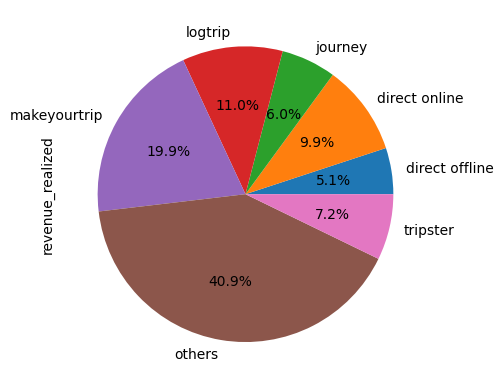

In [77]:
df_bookings_new.groupby('booking_platform')['revenue_realized'].sum().plot(kind='pie', autopct='%1.1f%%')